# MODELLING & EVALUATION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('cleaned_CollegePlacement.csv')

In [3]:
df

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Communication_Skills,Projects_Completed,Internship_Experience_Yes,Placement_Yes
0,0.500135,6,6,8,8,4,0,0
1,-0.164214,5,5,8,8,0,0,0
2,0.633004,5,5,9,1,1,0,0
3,1.496657,5,5,6,6,1,1,0
4,-0.230648,7,7,7,10,2,0,0
...,...,...,...,...,...,...,...,...
9995,1.297352,8,8,4,8,0,0,1
9996,-1.957954,9,9,7,7,2,0,0
9997,-0.695692,6,6,3,9,5,1,0
9998,0.500135,8,8,3,5,1,0,0


In [4]:
x=df.drop('Placement_Yes',axis=1)
y=df['Placement_Yes']

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score
train=[]
cv=[]
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=i)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    ypred_train=lg.predict(x_train)
    Train=accuracy_score(y_train,ypred_train)
    CV=cross_val_score(lg,x_train,y_train,cv=5,scoring='accuracy').mean()
    train.append(Train)
    cv.append(CV)

In [6]:
df1=pd.DataFrame({'Train':train,'CV':cv})
df2=df1[df1['Train']-df1['CV']<=0.5]
df2[df2['CV']==df2['CV'].max()]

,Train,CV
35,0.909125,0.909
95,0.909375,0.909


In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=35)

# LOGISTIC REGRESSION

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
l = LogisticRegression()
l.fit(x_train,y_train)
ypred_train = l.predict(x_train)
print("Train_accuracy: ",accuracy_score(y_train,ypred_train))
print("cross_validation: ",cross_val_score(l,x_train,y_train,cv=5,scoring="accuracy").mean())
ypred_test = l.predict(x_test)
print("Test_accuracy: ",accuracy_score(y_test,ypred_test))
print("Train:",classification_report(y_train,ypred_train))
print("Test:",classification_report(y_test,ypred_test))

Train_accuracy:  0.906
cross_validation:  0.905125
Test_accuracy:  0.903
Train:               precision    recall  f1-score   support

           0       0.93      0.96      0.94      6689
           1       0.76      0.62      0.68      1311

    accuracy                           0.91      8000
   macro avg       0.85      0.79      0.81      8000
weighted avg       0.90      0.91      0.90      8000

Test:               precision    recall  f1-score   support

           0       0.92      0.97      0.94      1652
           1       0.80      0.59      0.68       348

    accuracy                           0.90      2000
   macro avg       0.86      0.78      0.81      2000
weighted avg       0.90      0.90      0.90      2000



# KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
estimator = KNeighborsClassifier()
param_grid = {"n_neighbors":list(range(1,10))}
gd_knn=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
gd_knn.fit(x_train,y_train)
gd_knn.best_params_

{'n_neighbors': 7}

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
ypred_train = knn.predict(x_train)
print("train_accuracy: ",accuracy_score(y_train,ypred_train))
print("cross_validation: ",cross_val_score(knn,x_train,y_train,cv=5,scoring="accuracy").mean())
ypred_test = knn.predict(x_test)
print("test_accuracy: ",accuracy_score(y_test,ypred_test))
print("Train:",classification_report(y_train,ypred_train))
print("Test:",classification_report(y_test,ypred_test))

train_accuracy:  0.97175
cross_validation:  0.9555
test_accuracy:  0.9615
Train:               precision    recall  f1-score   support

           0       0.97      1.00      0.98      6689
           1       0.98      0.85      0.91      1311

    accuracy                           0.97      8000
   macro avg       0.97      0.92      0.95      8000
weighted avg       0.97      0.97      0.97      8000

Test:               precision    recall  f1-score   support

           0       0.96      0.99      0.98      1652
           1       0.96      0.81      0.88       348

    accuracy                           0.96      2000
   macro avg       0.96      0.90      0.93      2000
weighted avg       0.96      0.96      0.96      2000



# SVM

In [11]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
estimator = SVC()
param_grid = {'C':[0.01,0.1,1.0,10],'kernel':['poly','linear','rdf','sigmoid']}
gd_svc = GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
gd_svc.fit(x_train,y_train)
gd_svc.best_params_

{'C': 10, 'kernel': 'poly'}

In [12]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report
svm=SVC(C=10,kernel='poly')
svm.fit(x_train,y_train)
ypred_train = svm.predict(x_train)
print("train_accuracy: ",accuracy_score(y_train,ypred_train))
print("cross_validation: ",cross_val_score(svm,x_train,y_train,cv=5,scoring="accuracy").mean())
ypred_test = svm.predict(x_test)
print("test_accuracy: ",accuracy_score(y_test,ypred_test))
print("Train:",classification_report(y_train,ypred_train))
print("Test:",classification_report(y_test,ypred_test))

train_accuracy:  0.9375
cross_validation:  0.9341250000000001
test_accuracy:  0.936
Train:               precision    recall  f1-score   support

           0       0.95      0.97      0.96      6689
           1       0.85      0.75      0.80      1311

    accuracy                           0.94      8000
   macro avg       0.90      0.86      0.88      8000
weighted avg       0.94      0.94      0.94      8000

Test:               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1652
           1       0.85      0.76      0.81       348

    accuracy                           0.94      2000
   macro avg       0.90      0.87      0.88      2000
weighted avg       0.93      0.94      0.93      2000



# DECISION TREE

In [13]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt=DecisionTreeClassifier(random_state=35)
dt.fit(x_train,y_train)
ypred_train = dt.predict(x_train)
ypred_test = dt.predict(x_test)
print("train_accuracy:",accuracy_score(ypred_train,y_train))
print("test_accuracy: ",accuracy_score(y_test,ypred_test))
print("cross_validation:",cross_val_score(dt,x_train,y_train,cv=5,scoring="accuracy").mean())

train_accuracy: 1.0
test_accuracy:  0.998
cross_validation: 0.998375


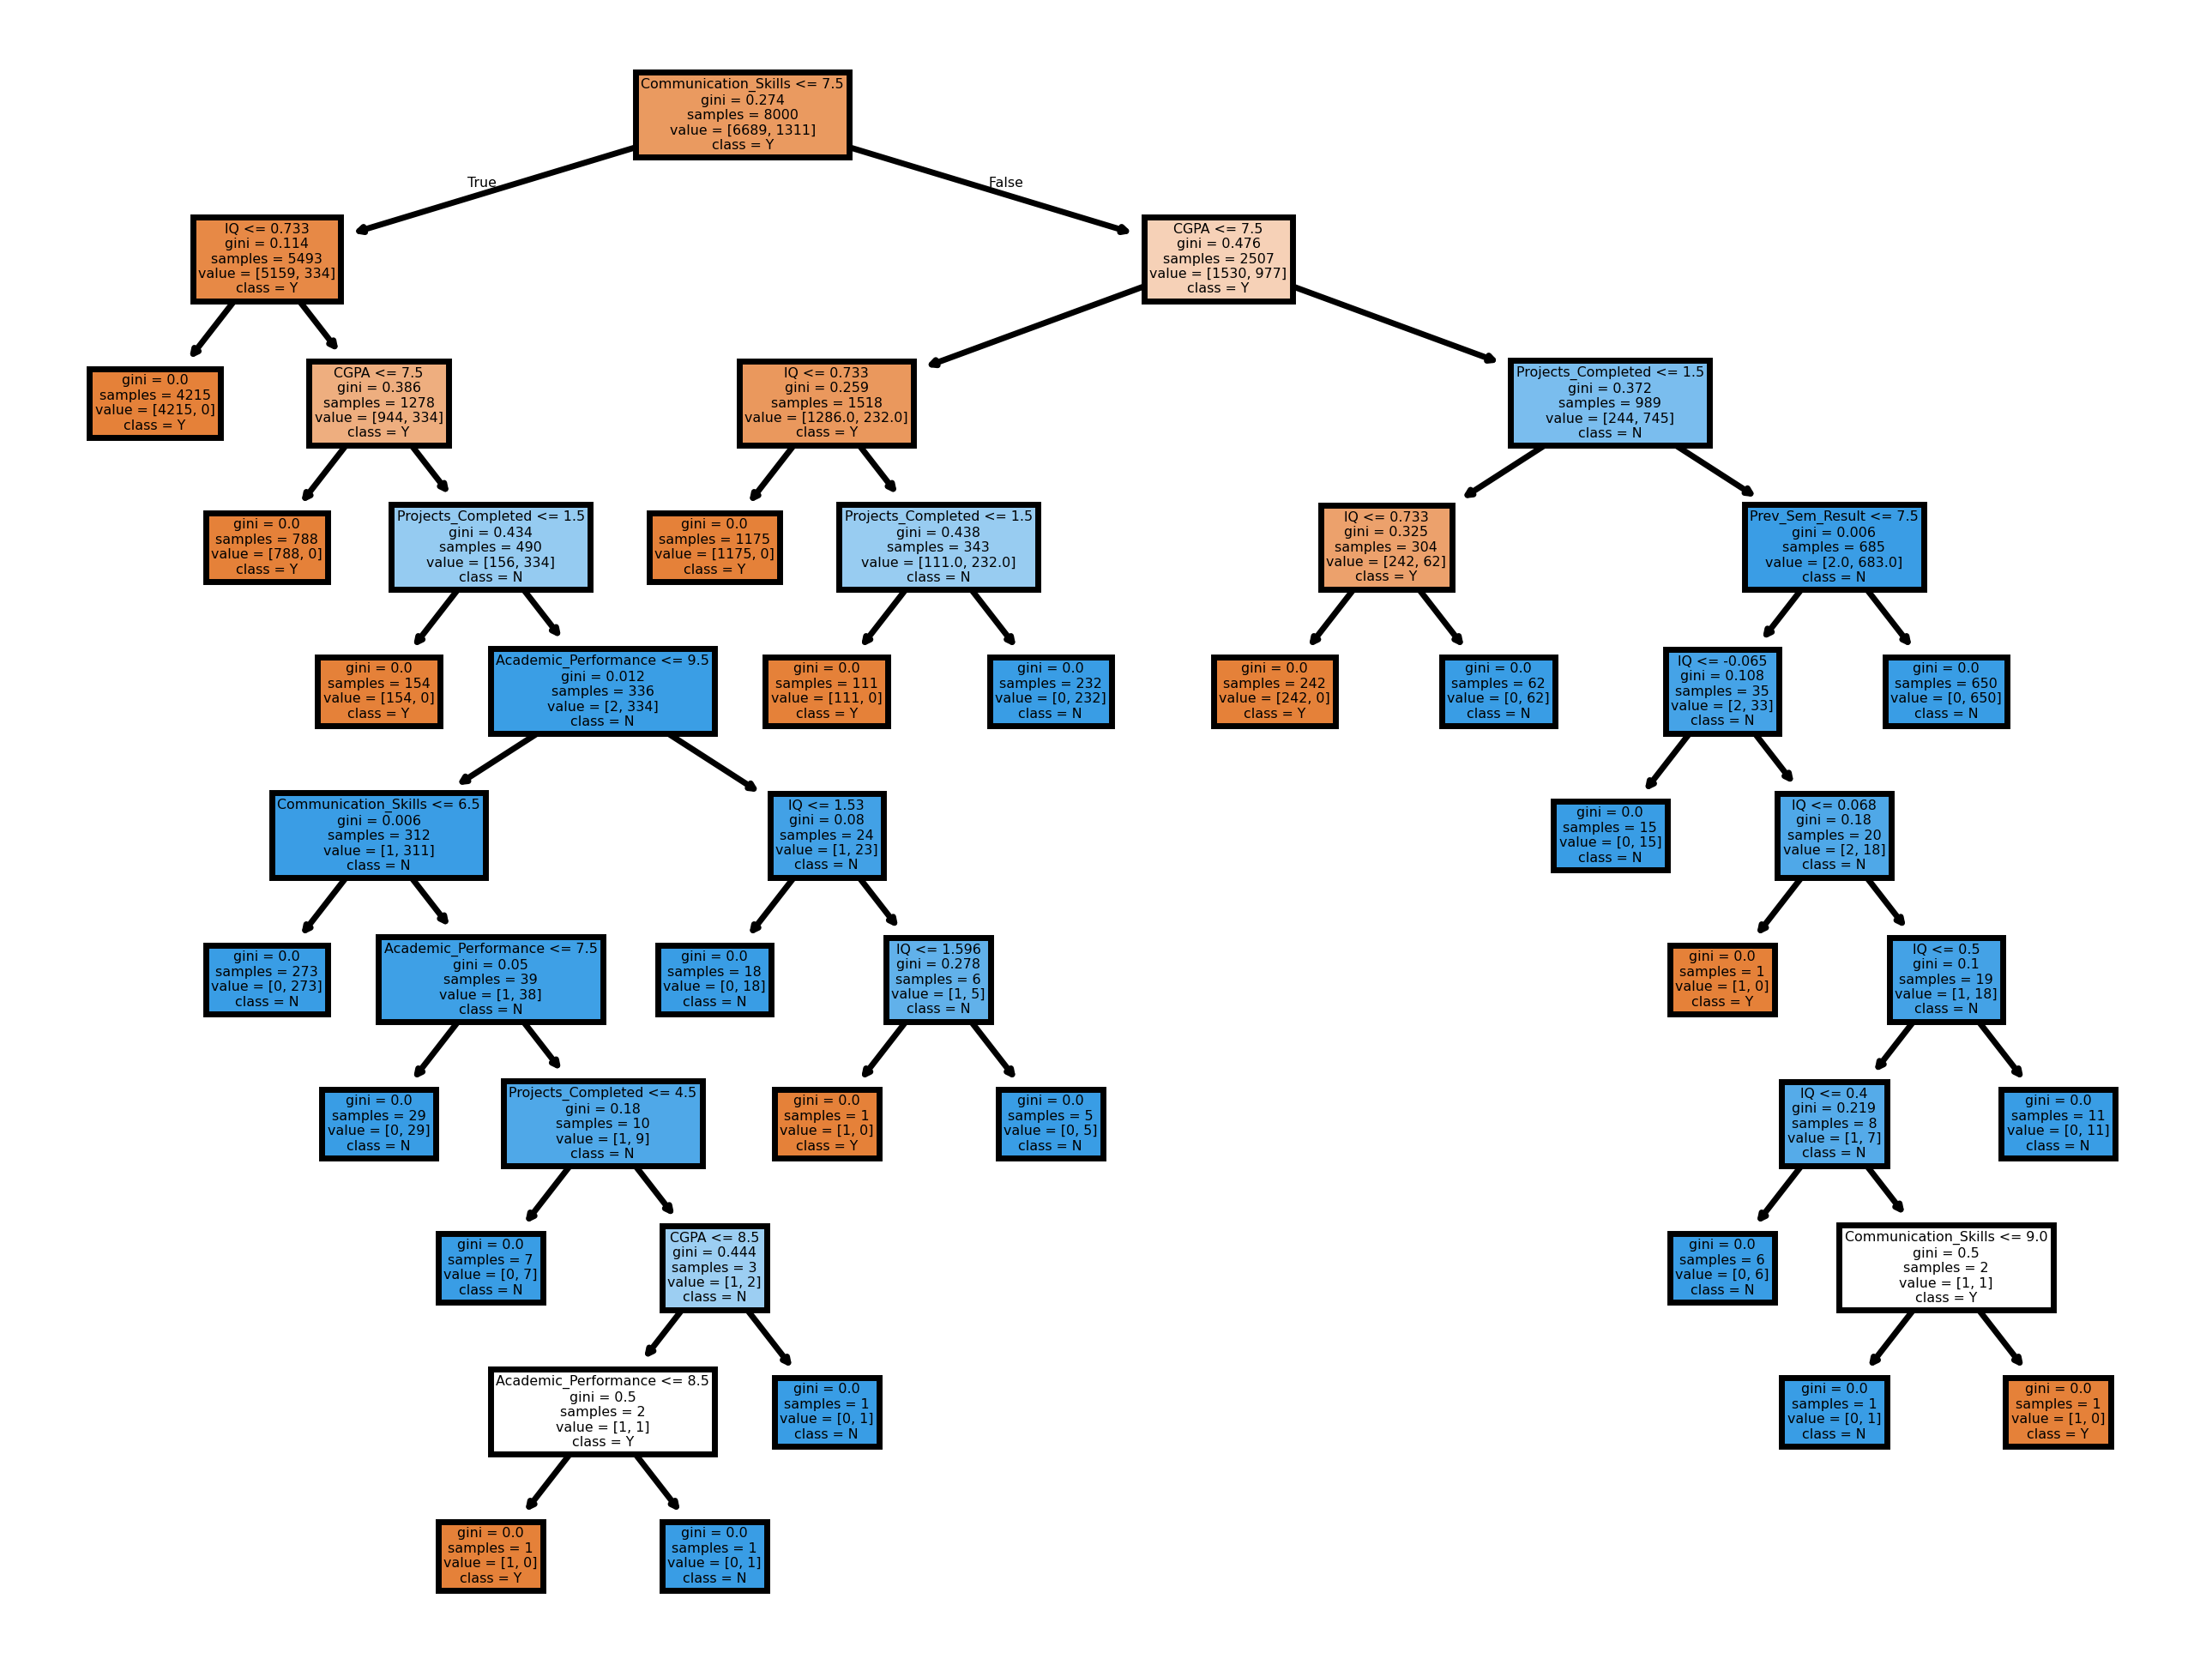

In [14]:
plt.figure(dpi=500)
plot_tree(dt,filled=True,
          feature_names=['IQ','Prev_Sem_Result','CGPA','Academic_Performance','Communication_Skills','Projects_Completed',
                         'Internship_Experience_Yes','Placement_Yes'],class_names=["Y","N"])
plt.show()

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
estimator = DecisionTreeClassifier(random_state=70)
param_grid = {"criterion":["gini","entropy"],"max_depth":list(range(1,10))}

gd_dt = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
gd_dt.fit(x_train,y_train)

gd_dt.best_params_

{'criterion': 'gini', 'max_depth': 4}

In [16]:
gd_dt.best_estimator_.feature_importances_

array([2.17708649e-01, 9.92837881e-05, 3.26183452e-01, 0.00000000e+00,
       1.70481113e-01, 2.85527502e-01, 0.00000000e+00])

In [17]:
feats = pd.DataFrame(data=gd_dt.best_estimator_.feature_importances_,
                    index=x.columns,
                    columns=["Feature Importacne"])
feats
feats_im = feats[feats["Feature Importacne"]>0]
imp_features = feats_im.index.to_list()
imp_features

['IQ', 'Prev_Sem_Result', 'CGPA', 'Communication_Skills', 'Projects_Completed']

In [18]:
x1=x[imp_features]
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y,train_size=0.8,random_state=35)
from sklearn.metrics import accuracy_score,classification_report
dt=DecisionTreeClassifier(criterion='gini',max_depth=4)
dt.fit(x1_train,y1_train)
y1pred_train = dt.predict(x1_train)
print("train_accuracy: ",accuracy_score(y1_train,y1pred_train))
print("cross_validation: ",cross_val_score(dt,x1_train,y1_train,cv=5,scoring="accuracy").mean())
y1pred_test = dt.predict(x1_test)
print("test_accuracy: ",accuracy_score(y1_test,y1pred_test))
print("Train:",classification_report(y1_train,y1pred_train))
print("Test:",classification_report(y1_test,y1pred_test))

train_accuracy:  0.9995
cross_validation:  0.9994999999999999
test_accuracy:  0.999
Train:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6689
           1       1.00      1.00      1.00      1311

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

Test:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1652
           1       0.99      1.00      1.00       348

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



# RANDOM FOREST

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
estimator=RandomForestClassifier()
param_grid={'n_estimators':list(range(1,50))}
gd_rf=GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
gd_rf.fit(x_train,y_train)
gd_rf.best_params_

{'n_estimators': 32}

In [20]:
gd_rf.best_estimator_.feature_importances_

array([0.27847876, 0.10706208, 0.15156166, 0.0112844 , 0.26855457,
       0.17947573, 0.00358279])

In [21]:
feats=pd.DataFrame(data=gd_rf.best_estimator_.feature_importances_,
                   index=x.columns,
                   columns=['feature_importance'])
feats
feats_imp=feats[feats['feature_importance']>0]
imp_features=feats_imp.index.to_list()
imp_features

['IQ',
 'Prev_Sem_Result',
 'CGPA',
 'Academic_Performance',
 'Communication_Skills',
 'Projects_Completed',
 'Internship_Experience_Yes']

In [22]:
x2=x[imp_features]
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y,train_size=0.8,random_state=35)
from sklearn.metrics import accuracy_score,classification_report
rf=RandomForestClassifier(n_estimators=19)
rf.fit(x2_train,y2_train)
y2pred_train = rf.predict(x2_train)
print("train_accuracy: ",accuracy_score(y2_train,y2pred_train))
print("cross_validation: ",cross_val_score(rf,x2_train,y2_train,cv=5,scoring="accuracy").mean())
y2pred_test = rf.predict(x2_test)
print("test_accuracy: ",accuracy_score(y2_test,y2pred_test))
print("Train:",classification_report(y2_train,y2pred_train))
print("Test:",classification_report(y2_test,y2pred_test))

train_accuracy:  0.999875
cross_validation:  0.999125
test_accuracy:  0.999
Train:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6689
           1       1.00      1.00      1.00      1311

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

Test:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1652
           1       0.99      1.00      1.00       348

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



# ADABOOSTING

In [23]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
estimator=AdaBoostClassifier()
param_grid={'n_estimators':list(range(1,50))}
gd_ad=GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
gd_ad.fit(x_train,y_train)
gd_ad.best_params_

{'n_estimators': 5}

In [24]:
gd_ad.best_estimator_.feature_importances_

array([0.25433095, 0.        , 0.19750171, 0.        , 0.37929046,
       0.16887688, 0.        ])

In [25]:
feats=pd.DataFrame(data=gd_ad.best_estimator_.feature_importances_,
                   index=x.columns,
                   columns=['feature_importance'])
feats
feats_imp=feats[feats['feature_importance']>0]
imp_features=feats_imp.index.to_list()
imp_features

['IQ', 'CGPA', 'Communication_Skills', 'Projects_Completed']

In [26]:
x3=x[imp_features]
x3_train,x3_test,y3_train,y3_test=train_test_split(x3,y,train_size=0.8,random_state=35)
from sklearn.metrics import accuracy_score,classification_report
ad=AdaBoostClassifier(n_estimators=5)
ad.fit(x3_train,y3_train)
y3pred_train =ad.predict(x3_train)
print("train_accuracy: ",accuracy_score(y3_train,y3pred_train))
print("cross_validation: ",cross_val_score(ad,x3_train,y3_train,cv=5,scoring="accuracy").mean())
y3pred_test = ad.predict(x3_test)
print("test_accuracy: ",accuracy_score(y3_test,y3pred_test))
print("Train:",classification_report(y3_train,y3pred_train))
print("Test:",classification_report(y3_test,y3pred_test))

train_accuracy:  0.9995
cross_validation:  0.9994999999999999
test_accuracy:  0.999
Train:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6689
           1       1.00      1.00      1.00      1311

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

Test:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1652
           1       0.99      1.00      1.00       348

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



# GRADIENTBOOSTING

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
estimator=GradientBoostingClassifier()
param_grid={'n_estimators':list(range(1,50)),'learning_rate':[0.1,0.4,0.5,0.6,0.7,0.2,0.8,0.3,0.9]}
gd_gb=GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
gd_gb.fit(x_train,y_train)
gd_gb.best_params_

{'learning_rate': 0.1, 'n_estimators': 43}

In [28]:
gd_gb.best_estimator_.feature_importances_

array([2.41594960e-01, 1.32021567e-16, 3.63753823e-01, 0.00000000e+00,
       2.21208402e-01, 1.73442815e-01, 0.00000000e+00])

In [29]:
feats=pd.DataFrame(data=gd_gb.best_estimator_.feature_importances_,
                   index=x.columns,
                   columns=['feature_importance'])
feats
feats_imp=feats[feats['feature_importance']>0]
imp_features=feats_imp.index.to_list()
imp_features

['IQ', 'Prev_Sem_Result', 'CGPA', 'Communication_Skills', 'Projects_Completed']

In [30]:
x4=x[imp_features]
x4_train,x4_test,y4_train,y4_test=train_test_split(x4,y,train_size=0.8,random_state=35)
from sklearn.metrics import accuracy_score,classification_report
gb=GradientBoostingClassifier(n_estimators=43,learning_rate=0.1)
gb.fit(x4_train,y4_train)
y4pred_train=gb.predict(x4_train)
print("train_accuracy: ",accuracy_score(y4_train,y4pred_train))
print("cross_validation: ",cross_val_score(gb,x4_train,y4_train,cv=5,scoring="accuracy").mean())
y4pred_test=gb.predict(x4_test)
print("test_accuracy: ",accuracy_score(y4_test,y4pred_test))
print("Train:",classification_report(y4_train,y4pred_train))
print("Test:",classification_report(y4_test,y4pred_test))

train_accuracy:  0.9995
cross_validation:  0.9994999999999999
test_accuracy:  0.999
Train:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6689
           1       1.00      1.00      1.00      1311

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

Test:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1652
           1       0.99      1.00      1.00       348

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



# XGBOOSTING

In [31]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
estimator=XGBClassifier()
param_grid={'n_estimators':[10,20,30,40,50,80],'max_depth':[3,4,6,9],'gamma':[0.1,0.3,0.6,0.7,0.13,0.9]}
gd_xg=GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
gd_xg.fit(x_train,y_train)
gd_xg.best_params_

{'gamma': 0.1, 'max_depth': 3, 'n_estimators': 20}

In [32]:
gd_xg.best_estimator_.feature_importances_

array([0.18068574, 0.02319568, 0.29987264, 0.        , 0.2118359 ,
       0.28441003, 0.        ], dtype=float32)

In [33]:
feats=pd.DataFrame(data=gd_xg.best_estimator_.feature_importances_,
                   index=x.columns,
                   columns=['feature_importance'])
feats
feats_imp=feats[feats['feature_importance']>0]
imp_features=feats_imp.index.to_list()
imp_features

['IQ', 'Prev_Sem_Result', 'CGPA', 'Communication_Skills', 'Projects_Completed']

In [35]:
x5=x[imp_features]
x5_train,x5_test,y5_train,y5_test=train_test_split(x5,y,train_size=0.8,random_state=35)
from sklearn.metrics import accuracy_score,classification_report
xg=XGBClassifier(n_estimators=20,max_depth=3,gamma=0.1)
xg.fit(x5_train,y5_train)
y5pred_train=xg.predict(x5_train)
print("train_accuracy: ",accuracy_score(y5_train,y5pred_train))
print("cross_validation: ",cross_val_score(xg,x5_train,y5_train,cv=5,scoring="accuracy").mean())
y5pred_test=xg.predict(x5_test)
print("test_accuracy: ",accuracy_score(y5_test,y5pred_test))
print("Train:",classification_report(y5_train,y5pred_train))
print("Test:",classification_report(y5_test,y5pred_test))

train_accuracy:  0.9995
cross_validation:  0.9994999999999999
test_accuracy:  0.999
Train:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6689
           1       1.00      1.00      1.00      1311

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

Test:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1652
           1       0.99      1.00      1.00       348

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

